In [2]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

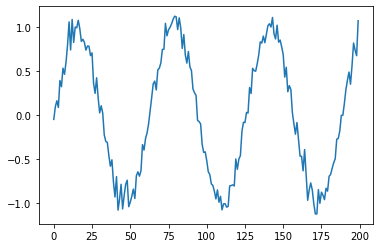

In [4]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1
plt.plot(series)
plt.show()

In [5]:
# build the dataset

T = 10
X = []
Y = []
for t in range(len(series) - T) :
    x = series[t:t+T]
    X.append(x)
    y = series[t + T]
    Y.append(Y)
    
np.array(X).shape
# np..array(Y). sjhape

(190, 10)

In [6]:
# # sequences data -> N x T x D -> 190 x 10 x 1
# X = np.array(X).reshape(-1, T, 1)
# Y = np.array(Y)

# #print(f"X.shape:{X.shape}, Y.shape:{Y.shape}, N.length:{N}")

In [7]:
# build a RNN Model
# 1. Input
i = Input(shape = (T, 1)) # T x D
# 2. SimpleRNN(5, activation= 'relu')
x = SimpleRNN(5, activation='relu')(i)
# 3. Output
x = Dense(1)(x)
model = Model(i, x)
# Quiz. trainable params - >  41 = hidden weights + current weights + bias
# = {features * unit} + {unit * unit} + {feature * unit}
model.compile(loss='mse', optimizer=Adam(lr=0.1))

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
N = len(X)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the RNN
r = model.fit(X[: -N//2], Y[:-N//2], epochs= 80)
